In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

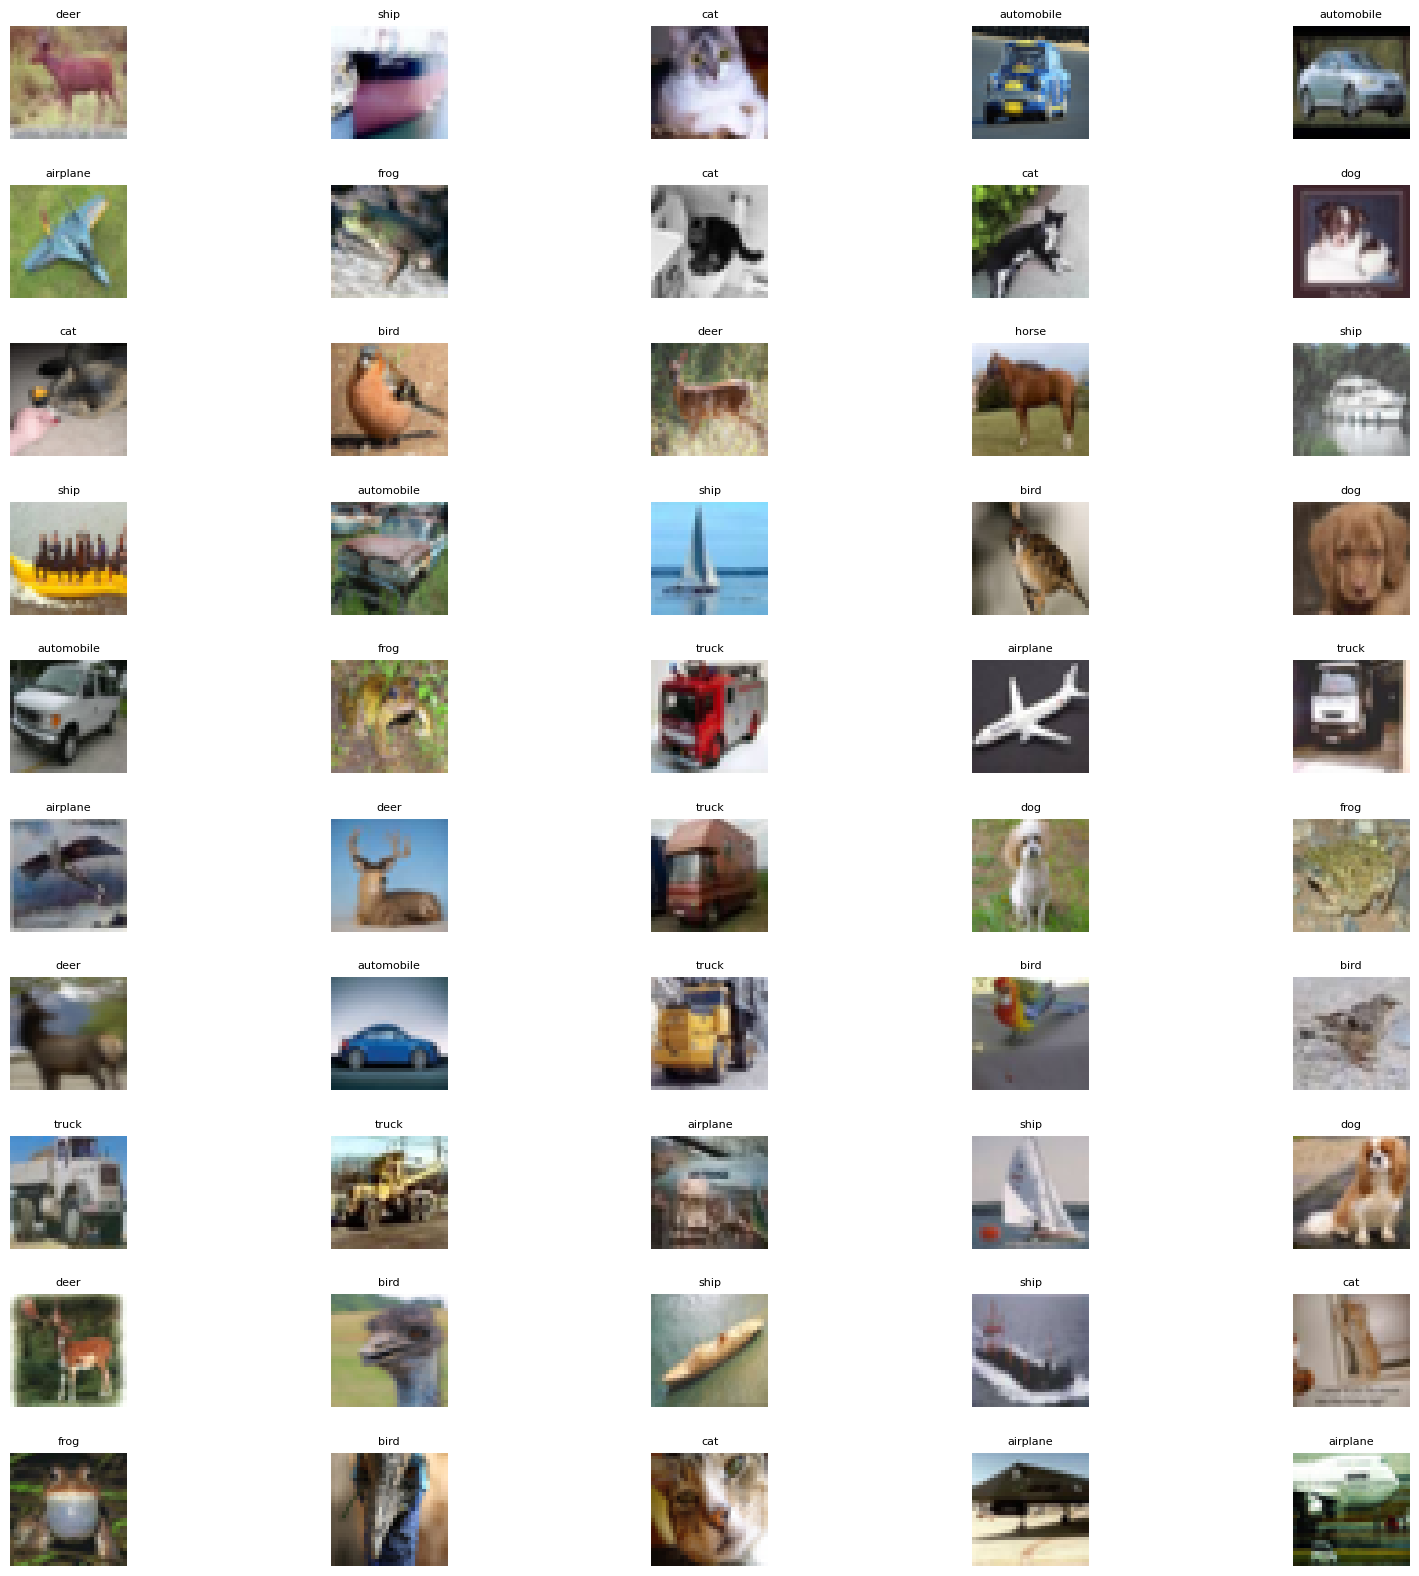

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
W_grid = 5
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
#

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(classes[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [7]:
#Normalising Image Data
x_train = x_train / 255.0
x_test = x_test / 255.0

# LeNet-5 Architecture

In [8]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [9]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 16, 16, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0

In [10]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [11]:
hist = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 18s 4ms/step - loss: 1.6297 - accuracy: 0.4082 - val_loss: 1.4338 - val_accuracy: 0.4919
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3538 - accuracy: 0.5161 - val_loss: 1.3128 - val_accuracy: 0.5323
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2218 - accuracy: 0.5636 - val_loss: 1.1911 - val_accuracy: 0.5794
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1271 - accuracy: 0.6008 - val_loss: 1.1714 - val_accuracy: 0.5884
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0614 - accuracy: 0.6252 - val_loss: 1.1753 - val_accuracy: 0.5907
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9988 - accuracy: 0.6478 - val_loss: 1.1435 - val_accuracy: 0.5994
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9460 - accuracy: 0.6665 - val_loss: 1.0648 - val_a

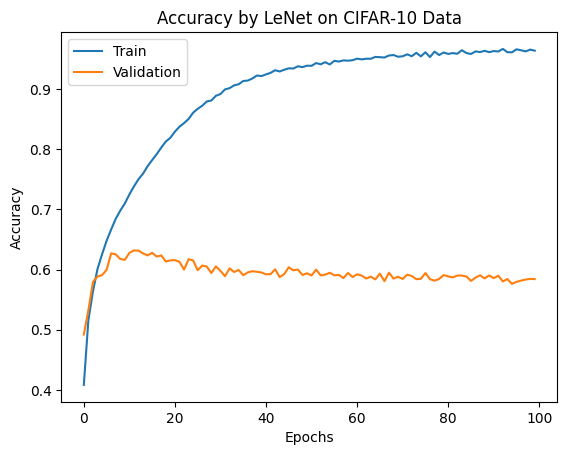

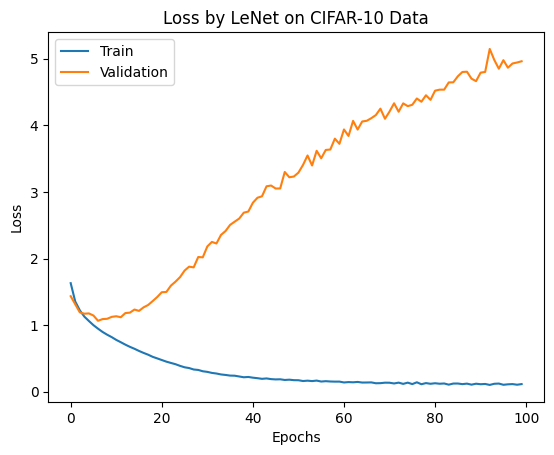

In [12]:
#Plotting the metrics
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

313/313 [==============================] - 1s 2ms/step


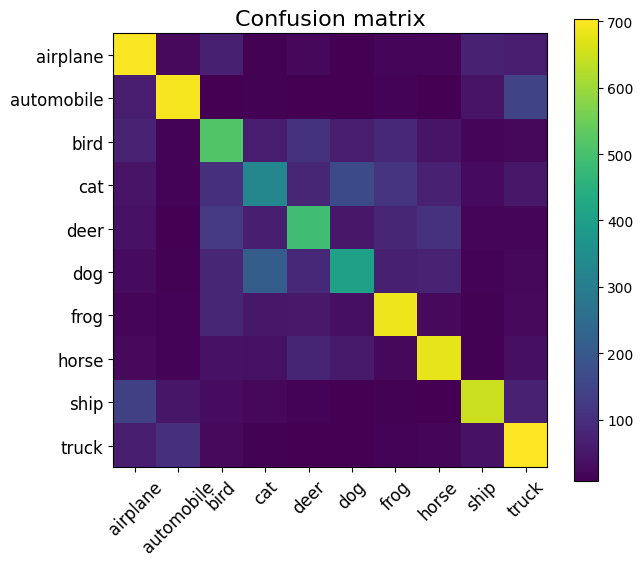

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [14]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.5841


# AlexNet Architecture

In [13]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [14]:
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 8, 8, 16)          448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 60)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 2, 2, 60)          32460     
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 30)         

In [15]:
hist_alexnet = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 13s 7ms/step - loss: 2.3003 - accuracy: 0.1242 - val_loss: 2.2957 - val_accuracy: 0.1557
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 2.2590 - accuracy: 0.1596 - val_loss: 2.1582 - val_accuracy: 0.1637
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0821 - accuracy: 0.1948 - val_loss: 1.9959 - val_accuracy: 0.2296
Epoch 4/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9712 - accuracy: 0.2414 - val_loss: 1.8626 - val_accuracy: 0.2775
Epoch 5/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8324 - accuracy: 0.2934 - val_loss: 1.7675 - val_accuracy: 0.3229
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7279 - accuracy: 0.3368 - val_loss: 1.7452 - val_accuracy: 0.3373
Epoch 7/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6615 - accuracy: 0.3638 - val_loss: 1.6639 - val_a

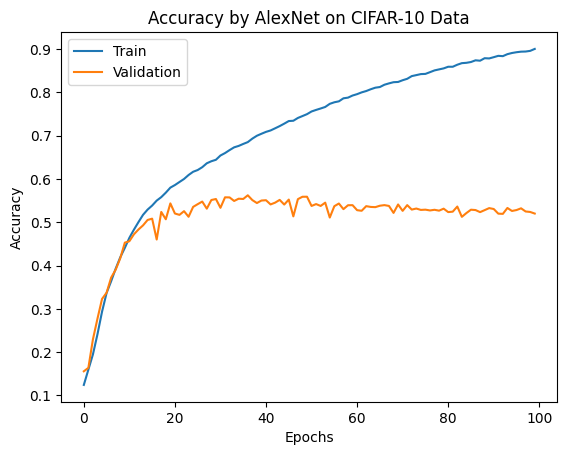

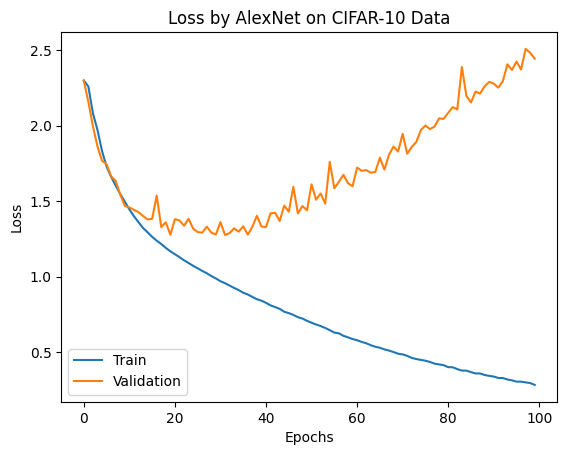

In [16]:
plt.plot(hist_alexnet.history['accuracy'])
plt.plot(hist_alexnet.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_alexnet.history['loss'])
plt.plot(hist_alexnet.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

313/313 [==============================] - 1s 2ms/step


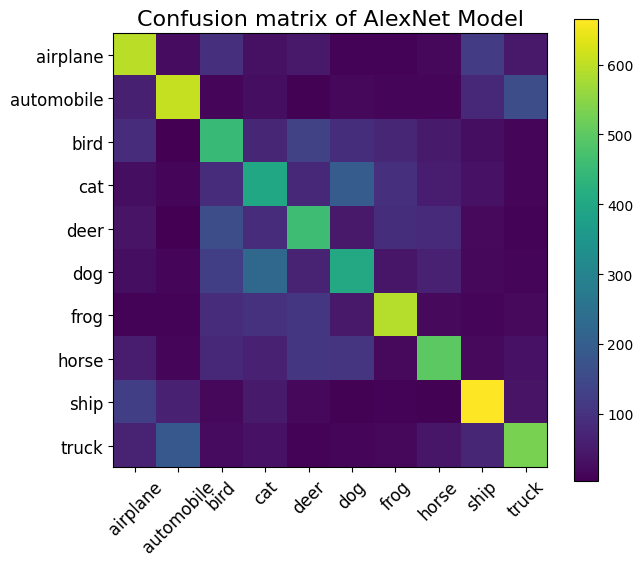

In [17]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [18]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions1))

Test accuracy by AlexNet: 0.5201


# VGG-16 Architecture

In [19]:
vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16_sequential_model = tf.keras.models.Sequential.from_config(vgg16.get_config())
vgg16_sequential_model.add(tf.keras.layers.GlobalAveragePooling2D())
vgg16_sequential_model.add(tf.keras.layers.Dense(10, activation='softmax'))
vgg16_sequential_model.compile(optimizer='SGD', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
vgg16_sequential_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                              

In [20]:
hist_vgg16 = vgg16_sequential_model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
1563/1563 [==============================] - 21s 12ms/step - loss: 2.3025 - accuracy: 0.1021 - val_loss: 2.3021 - val_accuracy: 0.1106
Epoch 2/100
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3003 - accuracy: 0.1175 - val_loss: 2.2931 - val_accuracy: 0.1253
Epoch 3/100
1563/1563 [==============================] - 18s 11ms/step - loss: 2.1339 - accuracy: 0.2076 - val_loss: 1.9658 - val_accuracy: 0.2783
Epoch 4/100
1563/1563 [==============================] - 18s 12ms/step - loss: 1.9259 - accuracy: 0.2867 - val_loss: 1.8522 - val_accuracy: 0.3251
Epoch 5/100
1563/1563 [==============================] - 18s 11ms/step - loss: 1.7682 - accuracy: 0.3467 - val_loss: 1.6812 - val_accuracy: 0.3722
Epoch 6/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6160 - accuracy: 0.4066 - val_loss: 1.7373 - val_accuracy: 0.3756
Epoch 7/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4950 - accuracy: 0.4500 - val_loss: 1

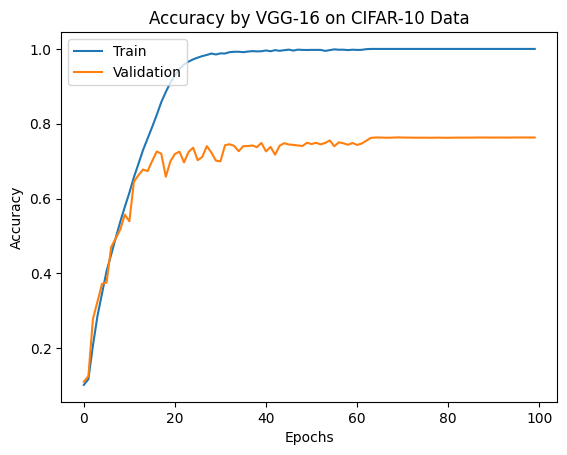

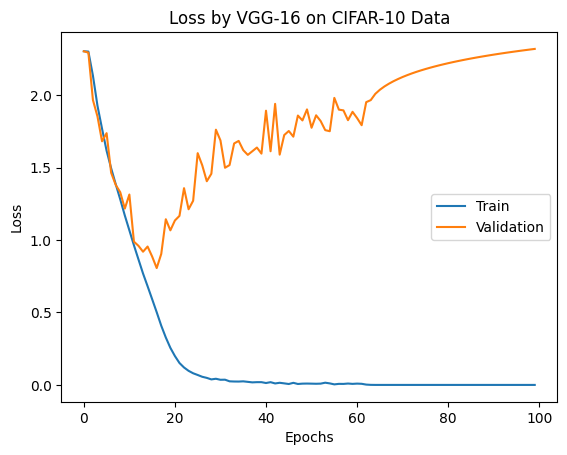

In [32]:
plt.plot(hist_vgg16.history['accuracy'])
plt.plot(hist_vgg16.history['val_accuracy'])
plt.title("Accuracy by VGG-16 on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_vgg16.history['loss'])
plt.plot(hist_vgg16.history['val_loss'])
plt.title('Loss by VGG-16 on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

313/313 [==============================] - 1s 3ms/step


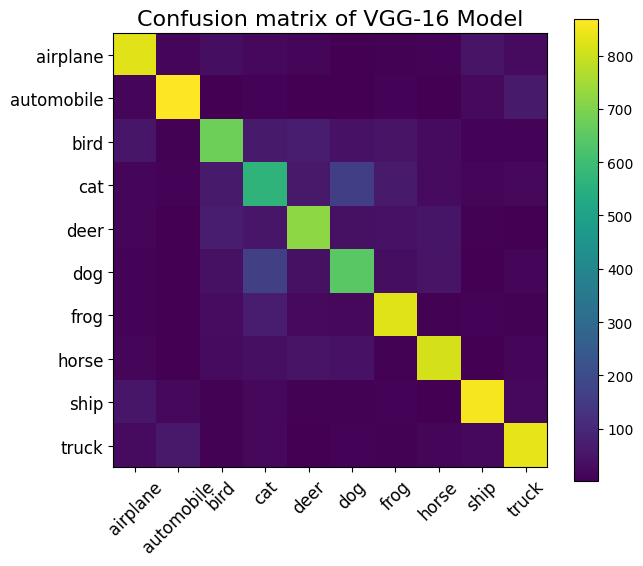

In [33]:
y_predictions2 = vgg16_sequential_model.predict(x_test)
y_predictions2.reshape(-1,)
y_predictions2= np.argmax(y_predictions2, axis=1)

plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of VGG-16 Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions2))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [26]:
print("Test accuracy by VGG-16:", accuracy_score(y_test, y_predictions2))

Test accuracy by VGG-16: 0.7633


# ResNet-50 Architecture

In [28]:
resnet50 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
inputs = tf.keras.Input(shape=(32, 32, 3))
resnet50_sequential_model = tf.keras.models.Sequential()
resnet50_sequential_model.add(resnet50)
resnet50_sequential_model.add(tf.keras.layers.GlobalAveragePooling2D())
resnet50_sequential_model.add(tf.keras.layers.Dense(10, activation='softmax'))
resnet50_sequential_model.compile(optimizer='SGD', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
resnet50_sequential_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_7 (Dense)             (None, 10)                20490     
                                                                 
Total params: 23608202 (90.06 MB)
Trainable params: 23555082 (89.86 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [29]:
hist_resnet = resnet50_sequential_model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
1563/1563 [==============================] - 78s 39ms/step - loss: 1.1874 - accuracy: 0.6090 - val_loss: 0.8105 - val_accuracy: 0.7252
Epoch 2/100
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7042 - accuracy: 0.7634 - val_loss: 0.6911 - val_accuracy: 0.7630
Epoch 3/100
1563/1563 [==============================] - 59s 38ms/step - loss: 0.5259 - accuracy: 0.8196 - val_loss: 0.7371 - val_accuracy: 0.7544
Epoch 4/100
1563/1563 [==============================] - 59s 38ms/step - loss: 0.3966 - accuracy: 0.8632 - val_loss: 0.6427 - val_accuracy: 0.7987
Epoch 5/100
1563/1563 [==============================] - 59s 38ms/step - loss: 0.3062 - accuracy: 0.8944 - val_loss: 0.6536 - val_accuracy: 0.7918
Epoch 6/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.2280 - accuracy: 0.9220 - val_loss: 0.7053 - val_accuracy: 0.7968
Epoch 7/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.1833 - accuracy: 0.9365 - val_loss: 0

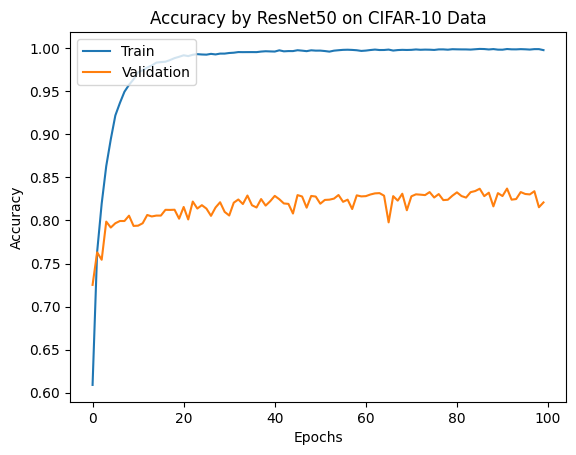

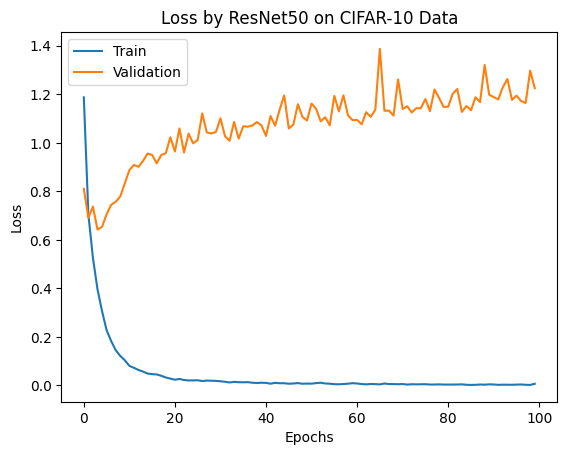

In [34]:
plt.plot(hist_resnet.history['accuracy'])
plt.plot(hist_resnet.history['val_accuracy'])
plt.title("Accuracy by ResNet50 on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_resnet.history['loss'])
plt.plot(hist_resnet.history['val_loss'])
plt.title('Loss by ResNet50 on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

313/313 [==============================] - 3s 7ms/step


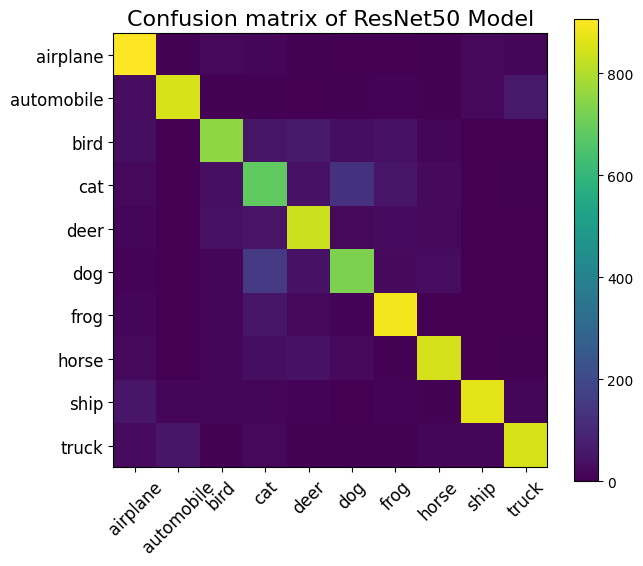

In [35]:
y_predictions3 = resnet50_sequential_model.predict(x_test)
y_predictions3.reshape(-1,)
y_predictions3= np.argmax(y_predictions3, axis=1)

plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of ResNet50 Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions3))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [36]:
print("Test accuracy by ResNet50:", accuracy_score(y_test, y_predictions3))

Test accuracy by ResNet50: 0.821
